In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score


import os

from math import sqrt

In [2]:
df = pd.read_csv('kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [75]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,0.009915
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.003727
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.009949
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,-0.026577
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.029014
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.005628
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.022352
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002,-0.005163
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332,0.001504
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,-0.045898


In [8]:
df.zipcode.unique

<bound method Series.unique of 0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: int64>

In [42]:
df_date = df[['date', 'price', 'zipcode']].copy()

df_date.sort_values(by='date', ascending=False)




,date,price,zipcode
1013,9/9/2014,429000.0,98122
9932,9/9/2014,689000.0,98146
17592,9/9/2014,527000.0,98056
18353,9/9/2014,1140000.0,98199
8113,9/9/2014,450000.0,98118
...,...,...,...
16071,1/12/2015,449000.0,98028
7946,1/12/2015,920000.0,98053
14571,1/12/2015,984000.0,98040
13533,1/12/2015,415000.0,98038


In [54]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015


In [55]:
df.loc[df['year'] < 2015]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,2014
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21587,7852140040,2014-08-25,507250.0,3,2.50,2270,5536,2.0,NaN,0.0,...,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731,2014
21589,3448900210,2014-10-14,610685.0,4,2.50,2520,6023,2.0,0.0,NaN,...,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023,2014
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014


In [90]:
df.loc[df['year'] > 2014]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015
7,2008000270,2015-01-15,291850.0,3,1.5,1060,9711,1.0,0.0,NaN,...,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,2015
8,2414600126,2015-04-15,229500.0,3,1.0,1780,7470,1.0,0.0,0.0,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,2015
9,3793500160,2015-03-12,323000.0,3,2.5,1890,6560,2.0,0.0,0.0,...,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,9834201367,2015-01-26,429000.0,3,2.0,1490,1126,3.0,0.0,0.0,...,1490,0.0,2014,0.0,98144,47.5699,-122.288,1400,1230,2015
21590,7936000429,2015-03-26,1010000.0,4,3.5,3510,7200,2.0,0.0,0.0,...,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200,2015
21591,2997800021,2015-02-19,475000.0,3,2.5,1310,1294,2.0,0.0,0.0,...,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,2015
21593,6600060120,2015-02-23,400000.0,4,2.5,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015


In [37]:
df_dups = df[['price','id']].copy()
df_dups.duplicated


<bound method DataFrame.duplicated of           price          id
0      221900.0  7129300520
1      538000.0  6414100192
2      180000.0  5631500400
3      604000.0  2487200875
4      510000.0  1954400510
...         ...         ...
21592  360000.0   263000018
21593  400000.0  6600060120
21594  402101.0  1523300141
21595  400000.0   291310100
21596  325000.0  1523300157

[21597 rows x 2 columns]>

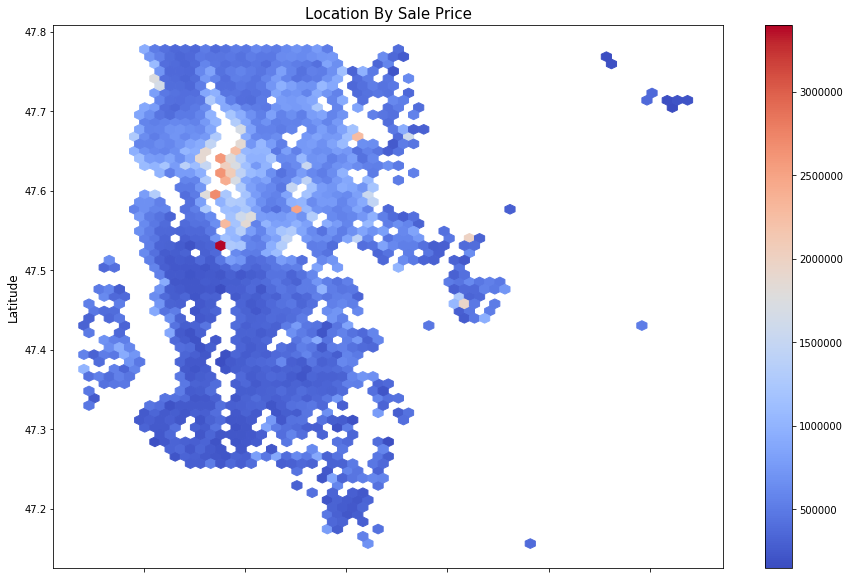

In [74]:
df.plot.hexbin(x = 'long', y = 'lat', C = 'price', gridsize = 60, cmap = 'coolwarm', figsize = (15, 10))

plt.title('Location By Sale Price', fontsize = 15)
plt.ylabel('Latitude', fontsize = 12)
plt.xlabel('Longitude', fontsize = 12)
plt.show()

In [89]:
import plotly.graph_objects as go

mapbox_access_token = "sk.eyJ1Ijoiam9ubWNndXJrIiwiYSI6ImNrYXprczkyMjBrZHIyem1pcno4eG40dXMifQ.rf9G9e2HLq0yRv5RhFufsQ"

fig = go.Figure(go.Scattermapbox(
        lat=[df['lat']],
        lon=[df['long']],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9
        ),
        
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38.92,
            lon=-77.07
        ),
        pitch=0,
        zoom=10
    ),
)

fig.show()